<a href="https://colab.research.google.com/github/kushalnavghare/cdac_solution/blob/master/data-crunch-competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QuickStart

##Basic step and workflow:

0 - Using this notebook

1 - Download data

2 - Explore data

3 - Choose and train a model

4 - Scoring

5 - Make prediction

6 - Submit

---

## 0 - Using this notebook 

To execute the cell press `shift+enter`. 

Follow the steps and login with your Google account.

In [1]:
import tensorflow as tf

In [2]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
# Lib & Dependencies
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
import requests
from scipy import stats

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1 - Download data

We will provide you with two dataset

- Training_data will be use to train your model.
- Hackathon_data will be use to make your prediciton.


There is three target you need to provide prediction on: target_r, target_g, target_b.




In [4]:
# Data Download (may take a few minutes depending on your network)
train_datalink_X = 'https://tournament.datacrunch.com/data/X_train.csv'  
train_datalink_y = 'https://tournament.datacrunch.com/data/y_train.csv' 
hackathon_data_link = 'https://tournament.datacrunch.com/data/X_test.csv' 

# Data for training
train_data = pd.read_csv(train_datalink_X)
# Data for which you will submit your prediction
test_data = pd.read_csv(hackathon_data_link)
# Targets to be predicted
train_targets = pd.read_csv(train_datalink_y)

# If you don't want to look at the problem as a time serie
train_data.drop(['id', 'Moons'], axis=1, inplace=True)
test_data.drop(['id', 'Moons'], axis=1, inplace=True)

In [5]:
display(train_data)
display(train_targets)
display(test_data)

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13
0,0.50,1.00,0.75,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.50,1.00,0.75,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.75,1.00,0.75,0.0,0.0,0.00,0.00,0.50,0.50,1.00,0.75,0.75,1.00
3,0.50,1.00,0.75,0.0,0.0,0.00,0.00,0.00,0.00,0.50,0.50,0.75,0.50
4,0.75,1.00,0.75,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6533,0.25,0.50,0.50,1.0,1.0,0.75,0.75,0.75,0.75,0.00,0.00,0.00,0.00
6534,0.00,0.25,0.25,1.0,1.0,0.25,0.25,0.00,0.00,0.00,0.00,0.00,0.00
6535,0.50,0.50,0.50,1.0,1.0,1.00,1.00,1.00,1.00,0.25,0.50,0.75,0.50
6536,0.25,0.75,1.00,1.0,1.0,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00


,target_r,target_g,target_b
0,0.25,0.25,0.25
1,0.00,0.00,0.00
2,0.50,0.50,0.50
3,0.00,0.00,0.00
4,0.75,1.00,0.75
...,...,...,...
6533,0.00,0.75,0.75
6534,0.00,0.00,0.00
6535,0.25,0.25,0.00
6536,0.25,0.25,0.00


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13
0,0.25,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.25,0.75,1.00,0.0,0.0,0.00,0.00,0.25,0.25,0.75,0.50,0.50,0.75
2,0.00,0.25,0.00,0.0,0.0,0.00,0.00,0.75,0.75,0.75,1.00,0.50,0.75
3,0.25,0.75,1.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.25,1.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.50,0.25,0.25,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3431,0.25,0.00,0.00,1.0,1.0,1.00,1.00,1.00,1.00,0.75,0.50,1.00,0.50
3432,1.00,0.50,1.00,1.0,1.0,0.75,0.75,1.00,1.00,0.50,0.75,0.75,0.50
3433,0.00,0.25,0.00,1.0,1.0,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00
3434,0.00,0.25,0.25,1.0,1.0,1.00,1.00,1.00,1.00,0.50,0.25,1.00,0.25


# 2 - Explore Data

Data processing is one of the most important part. Observe your data and prepare carefully what you will give to your model for training.

In [6]:
display(train_data.describe())
display(train_targets.describe())

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13
count,6538.000000,6538.000000,6538.000000,6538.000000,6538.000000,6538.000000,6538.000000,6538.000000,6538.000000,6538.000000,6538.000000,6538.000000,6538.000000
mean,0.493423,0.500000,0.490670,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.485852,0.486273,0.486273,0.486273
std,0.357847,0.353607,0.343442,0.353607,0.353607,0.353607,0.353607,0.353607,0.353607,0.367620,0.367623,0.367623,0.367623
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,target_r,target_g,target_b
count,6538.000000,6538.000000,6538.000000
mean,0.500000,0.500000,0.500000
std,0.353607,0.353607,0.353607
min,0.000000,0.000000,0.000000
25%,0.250000,0.250000,0.250000
50%,0.500000,0.500000,0.500000
75%,0.750000,0.750000,0.750000
max,1.000000,1.000000,1.000000


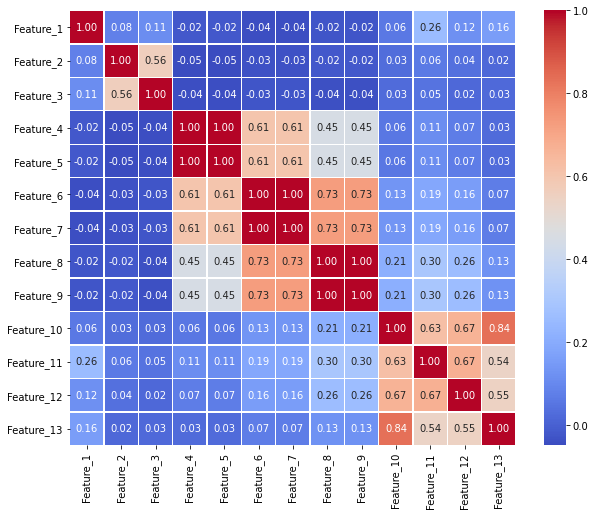

In [22]:
train_corr = train_data.corr()
test_corr = test_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(train_corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.4)

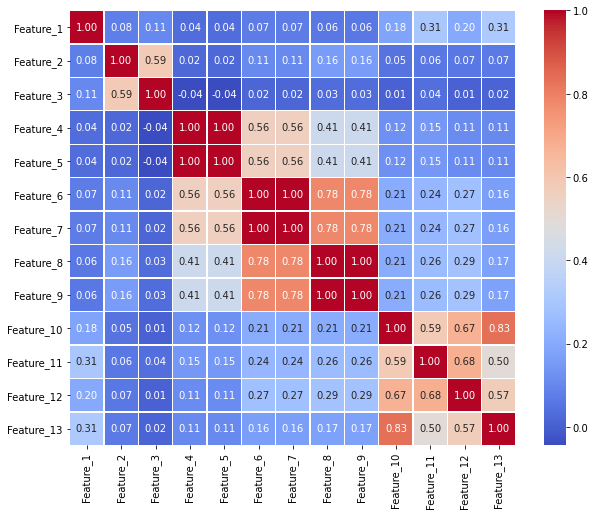

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(test_corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.4)

In [25]:
print(train_data.shape, test_data.shape)

(6538, 13) (3436, 13)


In [26]:
df_combind = pd.concat([train_data, test_data], axis=0)

In [27]:
df_combind.shape

(9974, 13)

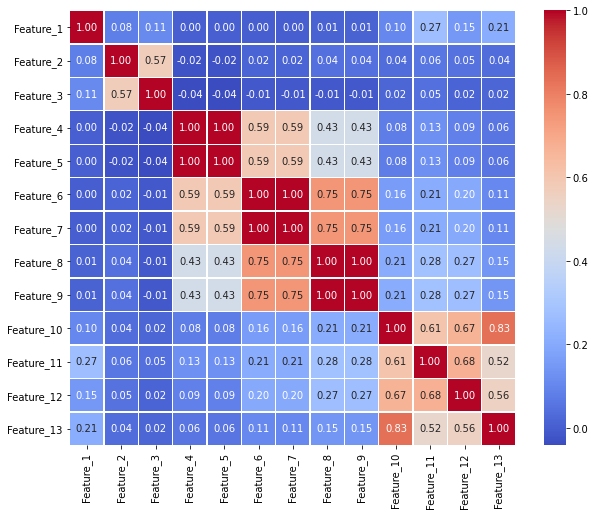

In [31]:
combind_corr = df_combind.corr()
plt.figure(figsize=(10,8))
sns.heatmap(combind_corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.4)

In [119]:
test_data.isna().sum()

Feature_1     0
Feature_2     0
Feature_3     0
Feature_4     0
Feature_5     0
Feature_6     0
Feature_7     0
Feature_8     0
Feature_9     0
Feature_10    0
Feature_11    0
Feature_12    0
Feature_13    0
dtype: int64

# 3 - Choose models

Crunch with originality!!! 👨🏻‍🏭

In [120]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, ShuffleSplit, learning_curve, RepeatedKFold

In [121]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [122]:
estimator = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

In [123]:
parameters = {
    'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'objective': ['reg:squarederror'], 
        'n_estimators': range(50, 1000, 50),
}

In [124]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

In [125]:
rand_search = RandomizedSearchCV(
    estimator=estimator,
    param_distributions=parameters,
    scoring = 'neg_mean_absolute_error',
    n_jobs = -1,
    cv = cv,
    verbose=True, random_state=42
)

In [126]:
def xg_boost_hackathon(data, target):
    X, y = data, target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    model = xgb.XGBRegressor(objective='reg:squarederror', max_depth=5, learning_rate=0.01, n_estimators=200, n_jobs=-1, colsample_bytree=0.5)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    scorer(y_test, pred)

    return model

In [127]:
def hyperparameter_opt(data, target):
    
    X, y = data, target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    estimator = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
    
    rand_search = RandomizedSearchCV(
        estimator=estimator,
        param_distributions=parameters,
        scoring = 'neg_mean_squared_error',
        n_jobs = -1,
        cv = cv,
        verbose=True, random_state=42)
    
    rand_search_result = rand_search.fit(X_train, y_train)
    print(rand_search_result.best_params_)
    return rand_search_result

In [128]:
target_r_params = hyperparameter_opt(train_data, train_targets.target_r)

Fitting 30 folds for each of 10 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.8min finished


{'subsample': 0.7, 'objective': 'reg:squarederror', 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.5}


In [129]:
target_g_params = hyperparameter_opt(train_data, train_targets.target_g)

Fitting 30 folds for each of 10 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.7min finished


{'subsample': 0.7, 'objective': 'reg:squarederror', 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.5}


In [130]:
target_b_params = hyperparameter_opt(train_data, train_targets.target_b)

Fitting 30 folds for each of 10 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.8min finished


{'subsample': 0.7, 'objective': 'reg:squarederror', 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.5}


# 4 - Modelling

In [131]:
def xg_boost_hackathon(data, target):
    X, y = data, target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    model = xgb.XGBRegressor(objective='reg:squarederror', subsample = 0.7, n_estimators = 200,
                             min_child_weight = 1, max_depth = 5, learning_rate = 0.01, colsample_bytree = 0.5)
    model.fit(X_train, y_train, eval_set = [(X_train, y_train), (X_test, y_test)], eval_metric='rmse')
    pred = model.predict(X_test)
    scorer(y_test, pred)

    return model

In [132]:
def scorer(y_test, y_pred):
    score = (stats.spearmanr(y_test, y_pred)*100)[0]
    print('Score as calculated for the leader board (っಠ‿ಠ)っ {}'.format(score))

# Train your Models on targets

You can submit continious target if you want

In [133]:
# Making prediction for target r
model_target_r = xg_boost_hackathon(train_data, train_targets.target_r)

[0]	validation_0-rmse:0.348136	validation_1-rmse:0.374263
[1]	validation_0-rmse:0.348073	validation_1-rmse:0.374308
[2]	validation_0-rmse:0.347986	validation_1-rmse:0.374367
[3]	validation_0-rmse:0.347915	validation_1-rmse:0.374388
[4]	validation_0-rmse:0.347839	validation_1-rmse:0.374389
[5]	validation_0-rmse:0.347739	validation_1-rmse:0.374387
[6]	validation_0-rmse:0.347653	validation_1-rmse:0.37439
[7]	validation_0-rmse:0.347572	validation_1-rmse:0.374417
[8]	validation_0-rmse:0.347479	validation_1-rmse:0.37443
[9]	validation_0-rmse:0.347375	validation_1-rmse:0.374467
[10]	validation_0-rmse:0.34731	validation_1-rmse:0.374469
[11]	validation_0-rmse:0.34723	validation_1-rmse:0.374503
[12]	validation_0-rmse:0.347144	validation_1-rmse:0.374519
[13]	validation_0-rmse:0.347072	validation_1-rmse:0.374529
[14]	validation_0-rmse:0.346985	validation_1-rmse:0.374544
[15]	validation_0-rmse:0.346906	validation_1-rmse:0.374567
[16]	validation_0-rmse:0.346825	validation_1-rmse:0.374589
[17]	valida

In [134]:
# Making prediction for target g
model_target_g = xg_boost_hackathon(train_data, train_targets.target_g)

[0]	validation_0-rmse:0.355433	validation_1-rmse:0.345657
[1]	validation_0-rmse:0.355325	validation_1-rmse:0.345603
[2]	validation_0-rmse:0.355231	validation_1-rmse:0.345612
[3]	validation_0-rmse:0.355146	validation_1-rmse:0.345565
[4]	validation_0-rmse:0.355049	validation_1-rmse:0.345505
[5]	validation_0-rmse:0.354934	validation_1-rmse:0.34547
[6]	validation_0-rmse:0.354842	validation_1-rmse:0.345466
[7]	validation_0-rmse:0.354731	validation_1-rmse:0.345424
[8]	validation_0-rmse:0.354645	validation_1-rmse:0.345416
[9]	validation_0-rmse:0.354531	validation_1-rmse:0.345405
[10]	validation_0-rmse:0.35445	validation_1-rmse:0.345348
[11]	validation_0-rmse:0.354344	validation_1-rmse:0.345304
[12]	validation_0-rmse:0.354233	validation_1-rmse:0.345304
[13]	validation_0-rmse:0.354151	validation_1-rmse:0.345233
[14]	validation_0-rmse:0.354049	validation_1-rmse:0.345151
[15]	validation_0-rmse:0.353935	validation_1-rmse:0.345121
[16]	validation_0-rmse:0.353846	validation_1-rmse:0.345079
[17]	vali

In [135]:
# Making prediction for target b
model_target_b = xg_boost_hackathon(train_data, train_targets.target_b)

[0]	validation_0-rmse:0.356316	validation_1-rmse:0.342002
[1]	validation_0-rmse:0.356214	validation_1-rmse:0.341908
[2]	validation_0-rmse:0.356123	validation_1-rmse:0.34192
[3]	validation_0-rmse:0.356022	validation_1-rmse:0.341869
[4]	validation_0-rmse:0.355902	validation_1-rmse:0.341795
[5]	validation_0-rmse:0.355765	validation_1-rmse:0.34174
[6]	validation_0-rmse:0.355656	validation_1-rmse:0.341735
[7]	validation_0-rmse:0.355549	validation_1-rmse:0.34166
[8]	validation_0-rmse:0.355455	validation_1-rmse:0.341631
[9]	validation_0-rmse:0.355347	validation_1-rmse:0.341611
[10]	validation_0-rmse:0.355254	validation_1-rmse:0.341575
[11]	validation_0-rmse:0.355147	validation_1-rmse:0.341532
[12]	validation_0-rmse:0.355032	validation_1-rmse:0.341512
[13]	validation_0-rmse:0.354924	validation_1-rmse:0.341434
[14]	validation_0-rmse:0.354824	validation_1-rmse:0.341374
[15]	validation_0-rmse:0.354703	validation_1-rmse:0.341318
[16]	validation_0-rmse:0.354613	validation_1-rmse:0.34125
[17]	valida

In [140]:
results = model_target_b.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

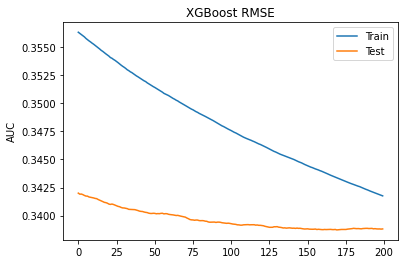

In [141]:
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()
plt.ylabel('AUC')
plt.title('XGBoost RMSE')
plt.show()

# 5 - Make prediction on the 3 targets

When you feel like your model is accurate enough it's time to predict the target and submit your results.

Repeat the operation on the three targets, concatenate the answers and submit.

**WARNING** 1/ Keep the raw order identical.

**WARNING** 2/ Be sure that your columns are named target_r, target-g and
 target_b.

**WARNING** 3/ Your prediction need to be between 0 and 1.

**WARNING** 4/ Don't submit constant values.

In [142]:
prediction = pd.DataFrame()
prediction['target_r'] = model_target_r.predict(test_data)
prediction['target_g'] = model_target_g.predict(test_data)
prediction['target_b'] = model_target_b.predict(test_data)

# 6 - Submit predictions

Past <u>your</u> API key here. You received it by email upon subscription and can find it on your leaderboard.


In [143]:
API_KEY = "x54XvYd9cjk7joIwDbCk9egCGai4y51bXapviNdTYyPM0bIdY9Y4OjNpTdmf" # <- HERE

r = requests.post("https://tournament.datacrunch.com/api/submission",
    files = {
        "file": ("x", prediction.to_csv().encode('ascii'))
    },
    data = {
        "apiKey": API_KEY
    },
)

if r.status_code == 200:
    print("Submission submitted :)")
elif r.status_code == 423:
    print("ERR: Submissions are close")
    print("You can only submit during rounds eg: Friday 7pm GMT+1 to Sunday midnight GMT+1.")
    print("Or the server is currently crunching the submitted files, please wait some time before retrying.")
elif r.status_code == 422:
    print("ERR: API Key is missing or empty")
    print("Did you forget to fill the API_KEY variable?")
elif r.status_code == 404:
    print("ERR: Unknown API Key")
    print("You should check that the provided API key is valid and is the same as the one you've received by email.")
elif r.status_code == 400:
    print("ERR: The file must not be empty")
    print("You have send a empty file.")
elif r.status_code == 401:
    print("ERR: Your email hasn't been verified")
    print("Please verify your email or contact a cruncher.")
elif r.status_code == 429:
    print("ERR: Too many submissions")
else:
    print("ERR: Server returned: " + str(r.status_code))
    print("Ouch! It seems that we were not expecting this kind of result from the server, if the probleme persist, contact a cruncher.")

Submission submitted :)


# How to improve your prediction




sklearn Docs
https://scikit-learn.org/stable/index.html

Tuning Tuning the hyper-parameters of an estimator 
https://scikit-learn.org/stable/modules/grid_search.html

Cross Validation (in Python and R) 
https://www.analyticsvidhya.com/blog/2018/05/improve-model-performance-cross-validation-in-python-r/

Possible ways to improve your prediction

1- Feature extraction and feature engineering; following methods are possible:

    princilpal component analysis (PCA)

    linear discriminant analysis (LDA)

    selecting best features (KBest)

    t-SNE method for feature engineering

    feature interactions using PolynomialFeatures

2- training multiple individual classifiers; these include:

    Keras neural networks

    Logistic regression

    Support vector machine

    Gaussian naive Bayes

    Random forrest classifier

    Extra trees classifier

    Gradient boost classifier

    AdaBoost classifier

    Bagging classifier

    Stochastic gradient descent

    K-Nearest neighbors

Grid search and cross validation are used with some of the classifiers in order to fine tune their hyperparameters. 

Pipelines are used for automating tasks when needed. 

Keras neural network can be easily reconfigured using different number of hidden layers and/or neurons per layer, along with different training algorithms.

3- aggregating individual classifiers using ensambling by soft voting, blending and stacking; possibilities include:

    blending with logistic regression

    blending with linear regression

    blending with Extremly randomised trees

    blending with Keras neural network classifier

    stacking with TensorFlow DNN classifier

    stacking with Extremly randomised trees

    stacking with Keras neural network classifier with Merged branches

    simple averageing of classifiers using different weights

In [ ]:
# Downloads data
from google.colab import files
with open("prediciton.csv", "wb") as f:
    f.write(prediction.to_csv().encode('ascii'))
files.download('prediciton.csv')

In [ ]:
from google.colab import files
import pickle

# Export model as pickle
pickle.dump(model_target_r, open("model_target_r.model", "wb"))
files.download('model_target_r.model')

In [ ]:
!pip freeze | grep "sklearn" 